In [68]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from pylab import rcParams
%pylab inline
rcParams['figure.figsize'] = 12, 6
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_absolute_error

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = pd.read_csv('tmp/grouped_mp_02.csv')

In [3]:
d = d[d.Expected != -1]
print len(d)

1180945


In [6]:
d = d.iloc[np.random.permutation(len(d))]

In [7]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1180945,590473.000000,340909.601163,1.00,295237.000000,590473.000000,885709.000000,1180945.000000
Id.1,1180945,590473.000000,340909.601163,1.00,295237.000000,590473.000000,885709.000000,1180945.000000
Expected,1180945,132.245290,603.080408,0.01,0.254000,1.016000,3.810002,33017.730000
cnt,1180945,11.656090,3.254159,1.00,10.000000,12.000000,14.000000,19.000000
null_ratio,1180945,0.370698,0.284461,0.00,0.027778,0.428571,0.666667,0.666667
radardist_km,1180945,11.183285,4.224058,0.00,9.000000,12.000000,14.000000,21.000000
Ref_mp,1180945,1.360182,3.572233,0.00,0.000000,0.139886,1.159858,146.278694
Ref_ecs,1180945,1.097677,2.183033,0.00,0.000000,0.208341,1.268685,64.742429
Ref_wcs,1180945,1.445159,2.874096,0.00,0.000000,0.274294,1.670301,85.237369
Ref_w8c,1180945,1.468605,4.725640,0.00,0.000000,0.092325,0.963435,244.070003


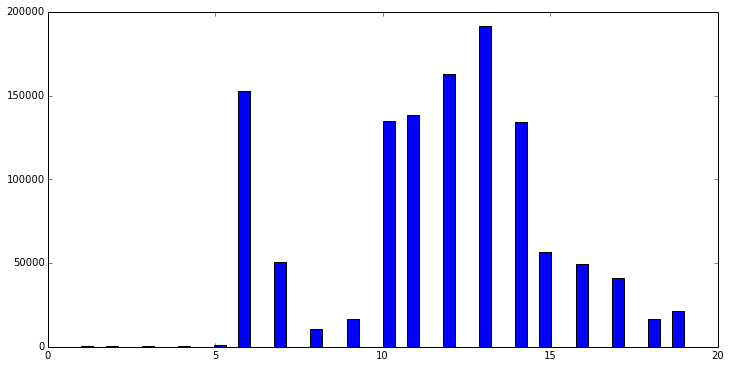

In [12]:
_ = plt.hist(d.cnt, bins=50)

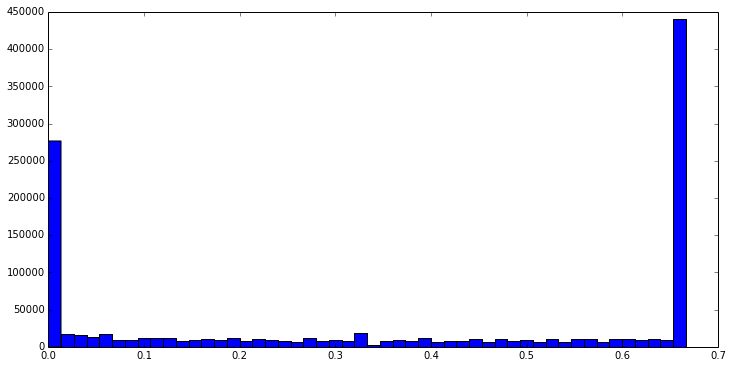

In [11]:
_ = plt.hist(d.null_ratio, bins=50)

In [13]:
tr = d

In [14]:
ho = tr[800000:]
tr = tr[:800000]

In [15]:
trl = tr.Expected
del tr['Expected']
hol = ho.Expected
del ho['Expected']

In [16]:
def evaluate_pred(p):
    return mean_absolute_error(hol, p)

In [17]:
def evaluate_model(m):
    m.fit(tr, trl)
    p = m.predict(ho)
    return mean_absolute_error(hol, p)

In [18]:
for c in tr.columns:
    if c.startswith('Ref'):
        print c, evaluate_pred(ho[c])

Ref_mp 132.377492217
Ref_ecs 132.279271775
Ref_wcs 132.343114015
Ref_w8c 132.491869882
Ref_rt 133.509821081
Ref_5x5_50th_mp 132.312861266
Ref_5x5_50th_ecs 132.273337352
Ref_5x5_50th_wcs 132.307189795
Ref_5x5_50th_w8c 132.371647003
Ref_5x5_50th_rt 132.979977006
RefComposite_mp 132.738551759
RefComposite_ecs 132.40223431
RefComposite_wcs 132.606588796
RefComposite_w8c 133.038668931
RefComposite_rt 135.32999279
RefComposite_5x5_50th_mp 132.574291403
RefComposite_5x5_50th_ecs 132.357204756
RefComposite_5x5_50th_wcs 132.518518496
RefComposite_5x5_50th_w8c 132.753995734
RefComposite_5x5_50th_rt 134.29029198


In [20]:
# m = xgb.XGBRegressor(n_estimators=200, nthread=4, learning_rate=0.05, max_depth=10)
# print evaluate_model(m)
#m = linear_model.LinearRegression()
#print evaluate_model(m)
#print m.coef_
# m = linear_model.Ridge(alpha=0.5)
# print evaluate_model(m)
# m = linear_model.Lasso(alpha=0.1)
# print evaluate_model(m)
# m = linear_model.BayesianRidge()
# print evaluate_model(m)
# m = linear_model.SGDRegressor()
# evaluate_model(m)

In [21]:
def evaluate_model_on_data(m, data):
    data = data.iloc[np.random.permutation(len(data))]
    lim = int(0.8 * len(data))
    tr = data[:lim]
    trl = tr.Expected
    del tr['Expected']
    ho = data[lim:]
    hol = ho.Expected
    del ho['Expected']
    m.fit(tr, trl)
    p = m.predict(ho)
    return mean_absolute_error(hol, p)

In [86]:
f = {}
f[1] = d[(d.cnt < 10) &
           (d.null_ratio < 0.02)]
f[2] = d[(10 <= d.cnt) & (d.cnt < 15) &
           (d.null_ratio < 0.02)]
f[3] = d[(15 <= d.cnt) &
           (d.null_ratio < 0.02)]
f[4] = d[(d.cnt < 10) &
           ( 0.02 <= d.null_ratio) & (d.null_ratio < 0.65)]
f[5] = d[(10 <= d.cnt) & (d.cnt < 15) &
           ( 0.02 <= d.null_ratio) & (d.null_ratio < 0.65)]
f[6] = d[(15 <= d.cnt) &
           ( 0.02 <= d.null_ratio) & (d.null_ratio < 0.65)]
f[7] = d[(d.cnt < 10) &
           ( 0.65 <= d.null_ratio)]
f[8] = d[(10 <= d.cnt) & (d.cnt < 15) &
           ( 0.65 <= d.null_ratio)]
f[9] = d[(15 <= d.cnt) &
           ( 0.65 <= d.null_ratio)]

In [105]:
param_grid = {
    'n_estimators': [1, 10, 50],
    'nthread': [6],
    'learning_rate': [0.01, 0.03, 0.06],
    'max_depth': [5, 10, 20],
    'objective':['reg:linear'],
    'min_child_weight': [1]
}

In [107]:
for i in range(1, 10):
    r = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=3, scoring=make_scorer(mean_absolute_error, greater_is_better=False))
    print i, evaluate_model_on_data(r, f[i])
    print r.best_params_
    print "=" * 20

1 21.3847552491
{'learning_rate': 0.06, 'nthread': 6, 'min_child_weight': 1, 'n_estimators': 1, 'objective': 'reg:linear', 'max_depth': 20}
2 9.3372758312
{'learning_rate': 0.03, 'nthread': 6, 'min_child_weight': 1, 'n_estimators': 50, 'objective': 'reg:linear', 'max_depth': 20}
3 12.014259978
{'learning_rate': 0.01, 'nthread': 6, 'min_child_weight': 1, 'n_estimators': 10, 'objective': 'reg:linear', 'max_depth': 5}
4 46.3640128419
{'learning_rate': 0.06, 'nthread': 6, 'min_child_weight': 1, 'n_estimators': 50, 'objective': 'reg:linear', 'max_depth': 20}
5 22.2351018908
{'learning_rate': 0.06, 'nthread': 6, 'min_child_weight': 1, 'n_estimators': 50, 'objective': 'reg:linear', 'max_depth': 20}
6 25.6994105235
{'learning_rate': 0.01, 'nthread': 6, 'min_child_weight': 1, 'n_estimators': 50, 'objective': 'reg:linear', 'max_depth': 20}
7 431.695508372
{'learning_rate': 0.01, 'nthread': 6, 'min_child_weight': 1, 'n_estimators': 10, 'objective': 'reg:linear', 'max_depth': 20}
8 218.865818963
{